# LOAD package

In [1]:
from astropy.io import fits
import numpy as np
from multiprocessing import Process
from sklearn.neighbors import BallTree
from astropy.cosmology import FlatLambdaCDM
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from astropy.table import Table,Column,hstack,vstack
from astropy.io import ascii
import os
import matplotlib.colors as mcolors

In [2]:
from astropy.cosmology import FlatLambdaCDM,z_at_value
cosmo = FlatLambdaCDM(H0 = 67.74,Om0 = 0.3089,Ob0 = 0.0486)
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd

In [3]:
import seaborn as sns
sns.set()

In [83]:
pwd

'/home/yunzheng/PAC/code/color_distribution'

# load data

## deep original data

In [4]:
deep0 = Table.read("/home/yunzheng/PAC/code/VVDS_desi/VVDS_deep_cata.fits")

In [5]:
deep0    #8153

NUM,ID-IAU,ALPHA,DELTA,MAGI,Z,ZFLAGS,MAG_U_CFH12K,MAGERR_AUTO_U,MAG_B_CFH12K,MAGERR_AUTO_B,MAG_V_CFH12K,MAGERR_AUTO_V,MAG_R_CFH12K,MAGERR_AUTO_R,MAG_I_CFH12K,MAGERR_AUTO_I,MAG_U_CFHTLS,MAGERR_AUTO_U_1,MAG_G_CFHTLS,MAGERR_AUTO_G,MAG_R_CFHTLS,MAGERR_AUTO_R_1,MAG_I_CFHTLS,MAGERR_AUTO_I_1,MAG_Z_CFHTLS,MAGERR_AUTO_Z,MAG_AUTO_U_UNCORR,MAG_AUTO_U_CORR,MAG_AUTO_ULOIANO,MAGERR_AUTO_ULOIANO,MAG_AUTO_B_UNCORR,MAG_AUTO_B_CORR,MAG_AUTO_V_UNCORR,MAG_AUTO_V_CORR,MAG_AUTO_R_UNCORR,MAG_AUTO_R_CORR,MAG_AUTO_I_UNCORR,MAG_AUTO_I_CORR,MAG1_APER_U,MAG1ERR_APER_U,MAG2_APER_U,MAG2ERR_APER_U,MAG1_APER_ULOIANO,MAG1ERR_APER_ULOIANO,MAG2_APER_ULOIANO,MAG2ERR_APER_ULOIANO,ISOAREA_IMAGE_U,THRESHOLD_U,MU_THRESHOLD_U,BACKGROUND_U,FLUX_MAX_U,MU_MAX_U,KRON_RADIUS_U,FLUX1_RADIUS_U,FLUX2_RADIUS_U,FLUX3_RADIUS_U,MAG_ISO_U,MAGERR_ISO_U,FLUX_ISO_U,FLUXERR_ISO_U,MAG_ISOCOR_U,MAGERR_ISOCOR_U,FLUX_ISOCOR_U,FLUXERR_ISOCOR_U,FLUX_AUTO_U,FLUXERR_AUTO_U,MAG_BEST_U,MAGERR_BEST_U,FLUX_BEST_U,FLUXERR_BEST_U,FLUX1_APER_U,FLUX1ERR_APER_U,FLUX2_APER_U,FLUX2ERR_APER_U,FLAGS_U,MAG1_APER_B,MAG1ERR_APER_B,MAG2_APER_B,MAG2ERR_APER_B,ISOAREA_IMAGE_B,THRESHOLD_B,MU_THRESHOLD_B,BACKGROUND_B,FLUX_MAX_B,MU_MAX_B,KRON_RADIUS_B,FLUX1_RADIUS_B,FLUX2_RADIUS_B,FLUX3_RADIUS_B,MAG_ISO_B,MAGERR_ISO_B,FLUX_ISO_B,FLUXERR_ISO_B,MAG_ISOCOR_B,MAGERR_ISOCOR_B,FLUX_ISOCOR_B,FLUXERR_ISOCOR_B,FLUX_AUTO_B,FLUXERR_AUTO_B,MAG_BEST_B,MAGERR_BEST_B,FLUX_BEST_B,FLUXERR_BEST_B,FLUX1_APER_B,FLUX1ERR_APER_B,FLUX2_APER_B,FLUX2ERR_APER_B,FLAGS_B,MAG_AUTO_J_WIRDS,MAGERR_AUTO_J_WIRDS,MAG_AUTO_H_WIRDS,MAGERR_AUTO_H_WIRDS,MAG_AUTO_K_WIRDS,MAGERR_AUTO_K_WIRDS,MAG_APER_J_WIRDS,MAGERR_APER_J_WIRDS,MAG_APER_H_WIRDS,MAGERR_APER_H_WIRDS,MAG_APER_K_WIRDS,MAGERR_APER_K_WIRDS,MAG_J_UKIDSS,MAGERR_J_UKIDSS,MAG_J_UKIDSS_CORR,MAG_K_UKIDSS,MAGERR_K_UKIDSS,MAG_K_UKIDSS_CORR,ZPHOT,ZPHOT_68_LOW,ZPHOT_68_HIGH,CHI2_GAL,ZPHOT_QSO,CHI2_QSO,CHI2_STAR,TYPE,CWW_MODEL,MAG_ABS_U_CFHTLS,MAG_ABS_G_CFHTLS,MAG_ABS_R_CFHTLS,MAG_ABS_I_CFHTLS,MAG_ABS_Z_CFHTLS,MAG_ABS_U_JKC,MAG_ABS_B_JKC,MAG_ABS_V_JKC,MAG_ABS_R_JKC,MAG_ABS_I_JKC,name1_4GHz,Fp14,Fp14er,Ft14,Ft14er,Fitmaj14,Fitmin14,PosAng14,Fp06,Fp06er,Ft06,Ft06er,Fitmaj06,Fitmin06,PosAng06,FLAG_GOOD_PZW,TSR,TSR_ERR_LOW,TSR_ERR_HIGH,W129,W129_ERR,SSR,SSR_ERR_LOW,SSR_ERR_HIGH,PSR,PSR_ERR_LOW,PSR_ERR_HIGH,TSR_ERR,AGE,E(B-V),MFUV,MNUV,STELLAR_MASS,SFR,NBAND,A_FUV,CWW_TYPE,DELTA_5MPC,FLAG_D_5MPC,DELTA_8MPC,FLAG_D_8MPC,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,FLAG,ZMETHOD,SPMASK_OBS,QUAD,SLIT,OBJ,ID_GALEX,FUV_NCAT_MAG_COR1,FUV_NCAT_MAGERR_COR1,NUV_MAG_COR1,NUV_MAGERR_COR1,ID_SWIRE,FLUX_AP1_36,UNCF_AP1_36,FLUX_AP2_36,UNCF_AP2_36,FLUX_AP3_36,UNCF_AP3_36,FLUX_AP4_36,UNCF_AP4_36,FLUX_AP5_36,UNCF_AP5_36,FLUX_KR_36,UNCF_KR_36,MAG_KR_36,RAD_KR_36,FLUX_ISO_36,UNCF_ISO_36,AREA_ISO_36,FLUX_ISOCOR_36,UNCF_ISOCOR_36,STELL_36,A_36,B_36,THETA_36,FWHM_36,FLUX_AP1_45,UNCF_AP1_45,FLUX_AP2_45,UNCF_AP2_45,FLUX_AP3_45,UNCF_AP3_45,FLUX_AP4_45,UNCF_AP4_45,FLUX_AP5_45,UNCF_AP5_45,FLUX_KR_45,UNCF_KR_45,MAG_KR_45,RAD_KR_45,FLUX_ISO_45,UNCF_ISO_45,AREA_ISO_45,FLUX_ISOCOR_45,UNCF_ISOCOR_45,STELL_45,A_45,B_45,THETA_45,FWHM_45,FLUX_AP1_58,UNCF_AP1_58,FLUX_AP2_58,UNCF_AP2_58,FLUX_AP3_58,UNCF_AP3_58,FLUX_AP4_58,UNCF_AP4_58,FLUX_AP5_58,UNCF_AP5_58,FLUX_KR_58,UNCF_KR_58,MAG_KR_58,RAD_KR_58,FLUX_ISO_58,UNCF_ISO_58,AREA_ISO_58,FLUX_ISOCOR_58,UNCF_ISOCOR_58,STELL_58,A_58,B_58,THETA_58,FWHM_58,FLUX_AP1_80,UNCF_AP1_80,FLUX_AP2_80,UNCF_AP2_80,FLUX_AP3_80,UNCF_AP3_80,FLUX_AP4_80,UNCF_AP4_80,FLUX_AP5_80,UNCF_AP5_80,FLUX_KR_80,UNCF_KR_80,MAG_KR_80,RAD_KR_80,FLUX_ISO_80,UNCF_ISO_80,AREA_ISO_80,FLUX_ISOCOR_80,UNCF_ISOCOR_80,STELL_80,A_80,B_80,THETA_80,FWHM_80,FLUX_PRF_24,FLUX_PRF_70,FLUX_PRF_160,UNCF_PRF_24,UNCF_PRF_70,UNCF_PRF_160,STAT_24,STAT_70,STAT_160,SIG,D_SIG,SIGB,D_SIGB,EW_OII_3727,D_EW_OII_3727,F_OII_3727,D_F_OII_3727,EW_OIII_4959,D_EW_OIII_4959,F_OIII_4959,D_F_OIII_4959,EW_OIII_5007,D_EW_OIII_5007,F_OIII_5007,D_F_OIII_5007,EW_NII_6584,D_EW_NII_6584,F_NII_6584,D_F_NII_6584,EW_SII_6717,D_EW_SII_6717,F_SII_6717,D_F_SII_6

## cigale output

In [5]:
deep_cigale = Table.read("/home/yunzheng/PAC/code/VVDS_desi/VVDS_SED_DEEP/deep/out/results.fits")

## lephare output

In [6]:
SED_Para = ['IDENT','SCALE_BEST','MOD_BEST','EXTLAW_BEST','EBV_BEST','CHI_BEST','NBAND_USED', \
            'AGE_BEST','AGE_INF','AGE_MED','AGE_SUP','MASS_BEST','MASS_INF','MASS_MED','MASS_SUP',\
            'SFR_BEST','SFR_INF','SFR_MED','SFR_SUP','SSFR_BEST','SSFR_INF','SSFR_MED','SSFR_SUP', \
            'B_OBS','V_OBS','R_OBS','I_OBS',\
            'ERR_B_OBS','ERR_V_OBS','ERR_R_OBS','ERR_I_OBS',\
            'B_MOD','V_MOD','R_MOD','I_MOD',\
            'CONTEXT','ZSPEC',\
            'B_ABS','V_ABS','R_ABS','I_ABS',\
            'Z_MAX']



deep = pd.read_table('/home/hygao/research/LePHARE/lephare_dev/zy_VVDS_deep_BVRI/VVDS_deep_BVRI.out',\
                              sep='\s+',skiprows=59,header=None,names=SED_Para,index_col=False)

In [7]:
zmax_deep = np.array(deep['Z_MAX'])
redshift_deep = np.array(deep['ZSPEC'])

In [9]:
redshift_deep

array([0.397 , 1.1714, 0.9911, ..., 0.6822, 0.4308, 0.7188])

# All

In [8]:
cigale = hstack((deep0,deep_cigale))

In [19]:
cigale.columns

<TableColumns names=('NUM','ID-IAU','ALPHA','DELTA','MAGI','Z','ZFLAGS','MAG_U_CFH12K','MAGERR_AUTO_U','MAG_B_CFH12K','MAGERR_AUTO_B','MAG_V_CFH12K','MAGERR_AUTO_V','MAG_R_CFH12K','MAGERR_AUTO_R','MAG_I_CFH12K','MAGERR_AUTO_I','MAG_U_CFHTLS','MAGERR_AUTO_U_1','MAG_G_CFHTLS','MAGERR_AUTO_G','MAG_R_CFHTLS','MAGERR_AUTO_R_1','MAG_I_CFHTLS','MAGERR_AUTO_I_1','MAG_Z_CFHTLS','MAGERR_AUTO_Z','MAG_AUTO_U_UNCORR','MAG_AUTO_U_CORR','MAG_AUTO_ULOIANO','MAGERR_AUTO_ULOIANO','MAG_AUTO_B_UNCORR','MAG_AUTO_B_CORR','MAG_AUTO_V_UNCORR','MAG_AUTO_V_CORR','MAG_AUTO_R_UNCORR','MAG_AUTO_R_CORR','MAG_AUTO_I_UNCORR','MAG_AUTO_I_CORR','MAG1_APER_U','MAG1ERR_APER_U','MAG2_APER_U','MAG2ERR_APER_U','MAG1_APER_ULOIANO','MAG1ERR_APER_ULOIANO','MAG2_APER_ULOIANO','MAG2ERR_APER_ULOIANO','ISOAREA_IMAGE_U','THRESHOLD_U','MU_THRESHOLD_U','BACKGROUND_U','FLUX_MAX_U','MU_MAX_U','KRON_RADIUS_U','FLUX1_RADIUS_U','FLUX2_RADIUS_U','FLUX3_RADIUS_U','MAG_ISO_U','MAGERR_ISO_U','FLUX_ISO_U','FLUXERR_ISO_U','MAG_ISOCOR_U','MAGERR

In [9]:
cigale.add_column(Column(name = 'zmax',length = len(zmax_deep),dtype = 'f8',data = zmax_deep))

In [25]:
cigale.columns

<TableColumns names=('NUM','ID-IAU','ALPHA','DELTA','MAGI','Z','ZFLAGS','MAG_U_CFH12K','MAGERR_AUTO_U','MAG_B_CFH12K','MAGERR_AUTO_B','MAG_V_CFH12K','MAGERR_AUTO_V','MAG_R_CFH12K','MAGERR_AUTO_R','MAG_I_CFH12K','MAGERR_AUTO_I','MAG_U_CFHTLS','MAGERR_AUTO_U_1','MAG_G_CFHTLS','MAGERR_AUTO_G','MAG_R_CFHTLS','MAGERR_AUTO_R_1','MAG_I_CFHTLS','MAGERR_AUTO_I_1','MAG_Z_CFHTLS','MAGERR_AUTO_Z','MAG_AUTO_U_UNCORR','MAG_AUTO_U_CORR','MAG_AUTO_ULOIANO','MAGERR_AUTO_ULOIANO','MAG_AUTO_B_UNCORR','MAG_AUTO_B_CORR','MAG_AUTO_V_UNCORR','MAG_AUTO_V_CORR','MAG_AUTO_R_UNCORR','MAG_AUTO_R_CORR','MAG_AUTO_I_UNCORR','MAG_AUTO_I_CORR','MAG1_APER_U','MAG1ERR_APER_U','MAG2_APER_U','MAG2ERR_APER_U','MAG1_APER_ULOIANO','MAG1ERR_APER_ULOIANO','MAG2_APER_ULOIANO','MAG2ERR_APER_ULOIANO','ISOAREA_IMAGE_U','THRESHOLD_U','MU_THRESHOLD_U','BACKGROUND_U','FLUX_MAX_U','MU_MAX_U','KRON_RADIUS_U','FLUX1_RADIUS_U','FLUX2_RADIUS_U','FLUX3_RADIUS_U','MAG_ISO_U','MAGERR_ISO_U','FLUX_ISO_U','FLUXERR_ISO_U','MAG_ISOCOR_U','MAGERR

In [10]:
cigale  # 8153

NUM,ID-IAU,ALPHA,DELTA,MAGI,Z,ZFLAGS,MAG_U_CFH12K,MAGERR_AUTO_U,MAG_B_CFH12K,MAGERR_AUTO_B,MAG_V_CFH12K,MAGERR_AUTO_V,MAG_R_CFH12K,MAGERR_AUTO_R,MAG_I_CFH12K,MAGERR_AUTO_I,MAG_U_CFHTLS,MAGERR_AUTO_U_1,MAG_G_CFHTLS,MAGERR_AUTO_G,MAG_R_CFHTLS,MAGERR_AUTO_R_1,MAG_I_CFHTLS,MAGERR_AUTO_I_1,MAG_Z_CFHTLS,MAGERR_AUTO_Z,MAG_AUTO_U_UNCORR,MAG_AUTO_U_CORR,MAG_AUTO_ULOIANO,MAGERR_AUTO_ULOIANO,MAG_AUTO_B_UNCORR,MAG_AUTO_B_CORR,MAG_AUTO_V_UNCORR,MAG_AUTO_V_CORR,MAG_AUTO_R_UNCORR,MAG_AUTO_R_CORR,MAG_AUTO_I_UNCORR,MAG_AUTO_I_CORR,MAG1_APER_U,MAG1ERR_APER_U,MAG2_APER_U,MAG2ERR_APER_U,MAG1_APER_ULOIANO,MAG1ERR_APER_ULOIANO,MAG2_APER_ULOIANO,MAG2ERR_APER_ULOIANO,ISOAREA_IMAGE_U,THRESHOLD_U,MU_THRESHOLD_U,BACKGROUND_U,FLUX_MAX_U,MU_MAX_U,KRON_RADIUS_U,FLUX1_RADIUS_U,FLUX2_RADIUS_U,FLUX3_RADIUS_U,MAG_ISO_U,MAGERR_ISO_U,FLUX_ISO_U,FLUXERR_ISO_U,MAG_ISOCOR_U,MAGERR_ISOCOR_U,FLUX_ISOCOR_U,FLUXERR_ISOCOR_U,FLUX_AUTO_U,FLUXERR_AUTO_U,MAG_BEST_U,MAGERR_BEST_U,FLUX_BEST_U,FLUXERR_BEST_U,FLUX1_APER_U,FLUX1ERR_APER_U,FLUX2_APER_U,FLUX2ERR_APER_U,FLAGS_U,MAG1_APER_B,MAG1ERR_APER_B,MAG2_APER_B,MAG2ERR_APER_B,ISOAREA_IMAGE_B,THRESHOLD_B,MU_THRESHOLD_B,BACKGROUND_B,FLUX_MAX_B,MU_MAX_B,KRON_RADIUS_B,FLUX1_RADIUS_B,FLUX2_RADIUS_B,FLUX3_RADIUS_B,MAG_ISO_B,MAGERR_ISO_B,FLUX_ISO_B,FLUXERR_ISO_B,MAG_ISOCOR_B,MAGERR_ISOCOR_B,FLUX_ISOCOR_B,FLUXERR_ISOCOR_B,FLUX_AUTO_B,FLUXERR_AUTO_B,MAG_BEST_B,MAGERR_BEST_B,FLUX_BEST_B,FLUXERR_BEST_B,FLUX1_APER_B,FLUX1ERR_APER_B,FLUX2_APER_B,FLUX2ERR_APER_B,FLAGS_B,MAG_AUTO_J_WIRDS,MAGERR_AUTO_J_WIRDS,MAG_AUTO_H_WIRDS,MAGERR_AUTO_H_WIRDS,MAG_AUTO_K_WIRDS,MAGERR_AUTO_K_WIRDS,MAG_APER_J_WIRDS,MAGERR_APER_J_WIRDS,MAG_APER_H_WIRDS,MAGERR_APER_H_WIRDS,MAG_APER_K_WIRDS,MAGERR_APER_K_WIRDS,MAG_J_UKIDSS,MAGERR_J_UKIDSS,MAG_J_UKIDSS_CORR,MAG_K_UKIDSS,MAGERR_K_UKIDSS,MAG_K_UKIDSS_CORR,ZPHOT,ZPHOT_68_LOW,ZPHOT_68_HIGH,CHI2_GAL,ZPHOT_QSO,CHI2_QSO,CHI2_STAR,TYPE,CWW_MODEL,MAG_ABS_U_CFHTLS,MAG_ABS_G_CFHTLS,MAG_ABS_R_CFHTLS,MAG_ABS_I_CFHTLS,MAG_ABS_Z_CFHTLS,MAG_ABS_U_JKC,MAG_ABS_B_JKC,MAG_ABS_V_JKC,MAG_ABS_R_JKC,MAG_ABS_I_JKC,name1_4GHz,Fp14,Fp14er,Ft14,Ft14er,Fitmaj14,Fitmin14,PosAng14,Fp06,Fp06er,Ft06,Ft06er,Fitmaj06,Fitmin06,PosAng06,FLAG_GOOD_PZW,TSR,TSR_ERR_LOW,TSR_ERR_HIGH,W129,W129_ERR,SSR,SSR_ERR_LOW,SSR_ERR_HIGH,PSR,PSR_ERR_LOW,PSR_ERR_HIGH,TSR_ERR,AGE,E(B-V),MFUV,MNUV,STELLAR_MASS,SFR,NBAND,A_FUV,CWW_TYPE,DELTA_5MPC,FLAG_D_5MPC,DELTA_8MPC,FLAG_D_8MPC,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,FLAG,ZMETHOD,SPMASK_OBS,QUAD,SLIT,OBJ,ID_GALEX,FUV_NCAT_MAG_COR1,FUV_NCAT_MAGERR_COR1,NUV_MAG_COR1,NUV_MAGERR_COR1,ID_SWIRE,FLUX_AP1_36,UNCF_AP1_36,FLUX_AP2_36,UNCF_AP2_36,FLUX_AP3_36,UNCF_AP3_36,FLUX_AP4_36,UNCF_AP4_36,FLUX_AP5_36,UNCF_AP5_36,FLUX_KR_36,UNCF_KR_36,MAG_KR_36,RAD_KR_36,FLUX_ISO_36,UNCF_ISO_36,AREA_ISO_36,FLUX_ISOCOR_36,UNCF_ISOCOR_36,STELL_36,A_36,B_36,THETA_36,FWHM_36,FLUX_AP1_45,UNCF_AP1_45,FLUX_AP2_45,UNCF_AP2_45,FLUX_AP3_45,UNCF_AP3_45,FLUX_AP4_45,UNCF_AP4_45,FLUX_AP5_45,UNCF_AP5_45,FLUX_KR_45,UNCF_KR_45,MAG_KR_45,RAD_KR_45,FLUX_ISO_45,UNCF_ISO_45,AREA_ISO_45,FLUX_ISOCOR_45,UNCF_ISOCOR_45,STELL_45,A_45,B_45,THETA_45,FWHM_45,FLUX_AP1_58,UNCF_AP1_58,FLUX_AP2_58,UNCF_AP2_58,FLUX_AP3_58,UNCF_AP3_58,FLUX_AP4_58,UNCF_AP4_58,FLUX_AP5_58,UNCF_AP5_58,FLUX_KR_58,UNCF_KR_58,MAG_KR_58,RAD_KR_58,FLUX_ISO_58,UNCF_ISO_58,AREA_ISO_58,FLUX_ISOCOR_58,UNCF_ISOCOR_58,STELL_58,A_58,B_58,THETA_58,FWHM_58,FLUX_AP1_80,UNCF_AP1_80,FLUX_AP2_80,UNCF_AP2_80,FLUX_AP3_80,UNCF_AP3_80,FLUX_AP4_80,UNCF_AP4_80,FLUX_AP5_80,UNCF_AP5_80,FLUX_KR_80,UNCF_KR_80,MAG_KR_80,RAD_KR_80,FLUX_ISO_80,UNCF_ISO_80,AREA_ISO_80,FLUX_ISOCOR_80,UNCF_ISOCOR_80,STELL_80,A_80,B_80,THETA_80,FWHM_80,FLUX_PRF_24,FLUX_PRF_70,FLUX_PRF_160,UNCF_PRF_24,UNCF_PRF_70,UNCF_PRF_160,STAT_24,STAT_70,STAT_160,SIG,D_SIG,SIGB,D_SIGB,EW_OII_3727,D_EW_OII_3727,F_OII_3727,D_F_OII_3727,EW_OIII_4959,D_EW_OIII_4959,F_OIII_4959,D_F_OIII_4959,EW_OIII_5007,D_EW_OIII_5007,F_OIII_5007,D_F_OIII_5007,EW_NII_6584,D_EW_NII_6584,F_NII_6584,D_F_NII_6584,EW_SII_6717,D_EW_SII_6717,F_SII_6717,D_F_SII_6

In [11]:
index = ((cigale['SSR']>0)&(cigale['TSR']>0)&(cigale['W129']>0))
cigale_new = cigale[index]

In [12]:
cigale_new   #8087

NUM,ID-IAU,ALPHA,DELTA,MAGI,Z,ZFLAGS,MAG_U_CFH12K,MAGERR_AUTO_U,MAG_B_CFH12K,MAGERR_AUTO_B,MAG_V_CFH12K,MAGERR_AUTO_V,MAG_R_CFH12K,MAGERR_AUTO_R,MAG_I_CFH12K,MAGERR_AUTO_I,MAG_U_CFHTLS,MAGERR_AUTO_U_1,MAG_G_CFHTLS,MAGERR_AUTO_G,MAG_R_CFHTLS,MAGERR_AUTO_R_1,MAG_I_CFHTLS,MAGERR_AUTO_I_1,MAG_Z_CFHTLS,MAGERR_AUTO_Z,MAG_AUTO_U_UNCORR,MAG_AUTO_U_CORR,MAG_AUTO_ULOIANO,MAGERR_AUTO_ULOIANO,MAG_AUTO_B_UNCORR,MAG_AUTO_B_CORR,MAG_AUTO_V_UNCORR,MAG_AUTO_V_CORR,MAG_AUTO_R_UNCORR,MAG_AUTO_R_CORR,MAG_AUTO_I_UNCORR,MAG_AUTO_I_CORR,MAG1_APER_U,MAG1ERR_APER_U,MAG2_APER_U,MAG2ERR_APER_U,MAG1_APER_ULOIANO,MAG1ERR_APER_ULOIANO,MAG2_APER_ULOIANO,MAG2ERR_APER_ULOIANO,ISOAREA_IMAGE_U,THRESHOLD_U,MU_THRESHOLD_U,BACKGROUND_U,FLUX_MAX_U,MU_MAX_U,KRON_RADIUS_U,FLUX1_RADIUS_U,FLUX2_RADIUS_U,FLUX3_RADIUS_U,MAG_ISO_U,MAGERR_ISO_U,FLUX_ISO_U,FLUXERR_ISO_U,MAG_ISOCOR_U,MAGERR_ISOCOR_U,FLUX_ISOCOR_U,FLUXERR_ISOCOR_U,FLUX_AUTO_U,FLUXERR_AUTO_U,MAG_BEST_U,MAGERR_BEST_U,FLUX_BEST_U,FLUXERR_BEST_U,FLUX1_APER_U,FLUX1ERR_APER_U,FLUX2_APER_U,FLUX2ERR_APER_U,FLAGS_U,MAG1_APER_B,MAG1ERR_APER_B,MAG2_APER_B,MAG2ERR_APER_B,ISOAREA_IMAGE_B,THRESHOLD_B,MU_THRESHOLD_B,BACKGROUND_B,FLUX_MAX_B,MU_MAX_B,KRON_RADIUS_B,FLUX1_RADIUS_B,FLUX2_RADIUS_B,FLUX3_RADIUS_B,MAG_ISO_B,MAGERR_ISO_B,FLUX_ISO_B,FLUXERR_ISO_B,MAG_ISOCOR_B,MAGERR_ISOCOR_B,FLUX_ISOCOR_B,FLUXERR_ISOCOR_B,FLUX_AUTO_B,FLUXERR_AUTO_B,MAG_BEST_B,MAGERR_BEST_B,FLUX_BEST_B,FLUXERR_BEST_B,FLUX1_APER_B,FLUX1ERR_APER_B,FLUX2_APER_B,FLUX2ERR_APER_B,FLAGS_B,MAG_AUTO_J_WIRDS,MAGERR_AUTO_J_WIRDS,MAG_AUTO_H_WIRDS,MAGERR_AUTO_H_WIRDS,MAG_AUTO_K_WIRDS,MAGERR_AUTO_K_WIRDS,MAG_APER_J_WIRDS,MAGERR_APER_J_WIRDS,MAG_APER_H_WIRDS,MAGERR_APER_H_WIRDS,MAG_APER_K_WIRDS,MAGERR_APER_K_WIRDS,MAG_J_UKIDSS,MAGERR_J_UKIDSS,MAG_J_UKIDSS_CORR,MAG_K_UKIDSS,MAGERR_K_UKIDSS,MAG_K_UKIDSS_CORR,ZPHOT,ZPHOT_68_LOW,ZPHOT_68_HIGH,CHI2_GAL,ZPHOT_QSO,CHI2_QSO,CHI2_STAR,TYPE,CWW_MODEL,MAG_ABS_U_CFHTLS,MAG_ABS_G_CFHTLS,MAG_ABS_R_CFHTLS,MAG_ABS_I_CFHTLS,MAG_ABS_Z_CFHTLS,MAG_ABS_U_JKC,MAG_ABS_B_JKC,MAG_ABS_V_JKC,MAG_ABS_R_JKC,MAG_ABS_I_JKC,name1_4GHz,Fp14,Fp14er,Ft14,Ft14er,Fitmaj14,Fitmin14,PosAng14,Fp06,Fp06er,Ft06,Ft06er,Fitmaj06,Fitmin06,PosAng06,FLAG_GOOD_PZW,TSR,TSR_ERR_LOW,TSR_ERR_HIGH,W129,W129_ERR,SSR,SSR_ERR_LOW,SSR_ERR_HIGH,PSR,PSR_ERR_LOW,PSR_ERR_HIGH,TSR_ERR,AGE,E(B-V),MFUV,MNUV,STELLAR_MASS,SFR,NBAND,A_FUV,CWW_TYPE,DELTA_5MPC,FLAG_D_5MPC,DELTA_8MPC,FLAG_D_8MPC,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,FLAG,ZMETHOD,SPMASK_OBS,QUAD,SLIT,OBJ,ID_GALEX,FUV_NCAT_MAG_COR1,FUV_NCAT_MAGERR_COR1,NUV_MAG_COR1,NUV_MAGERR_COR1,ID_SWIRE,FLUX_AP1_36,UNCF_AP1_36,FLUX_AP2_36,UNCF_AP2_36,FLUX_AP3_36,UNCF_AP3_36,FLUX_AP4_36,UNCF_AP4_36,FLUX_AP5_36,UNCF_AP5_36,FLUX_KR_36,UNCF_KR_36,MAG_KR_36,RAD_KR_36,FLUX_ISO_36,UNCF_ISO_36,AREA_ISO_36,FLUX_ISOCOR_36,UNCF_ISOCOR_36,STELL_36,A_36,B_36,THETA_36,FWHM_36,FLUX_AP1_45,UNCF_AP1_45,FLUX_AP2_45,UNCF_AP2_45,FLUX_AP3_45,UNCF_AP3_45,FLUX_AP4_45,UNCF_AP4_45,FLUX_AP5_45,UNCF_AP5_45,FLUX_KR_45,UNCF_KR_45,MAG_KR_45,RAD_KR_45,FLUX_ISO_45,UNCF_ISO_45,AREA_ISO_45,FLUX_ISOCOR_45,UNCF_ISOCOR_45,STELL_45,A_45,B_45,THETA_45,FWHM_45,FLUX_AP1_58,UNCF_AP1_58,FLUX_AP2_58,UNCF_AP2_58,FLUX_AP3_58,UNCF_AP3_58,FLUX_AP4_58,UNCF_AP4_58,FLUX_AP5_58,UNCF_AP5_58,FLUX_KR_58,UNCF_KR_58,MAG_KR_58,RAD_KR_58,FLUX_ISO_58,UNCF_ISO_58,AREA_ISO_58,FLUX_ISOCOR_58,UNCF_ISOCOR_58,STELL_58,A_58,B_58,THETA_58,FWHM_58,FLUX_AP1_80,UNCF_AP1_80,FLUX_AP2_80,UNCF_AP2_80,FLUX_AP3_80,UNCF_AP3_80,FLUX_AP4_80,UNCF_AP4_80,FLUX_AP5_80,UNCF_AP5_80,FLUX_KR_80,UNCF_KR_80,MAG_KR_80,RAD_KR_80,FLUX_ISO_80,UNCF_ISO_80,AREA_ISO_80,FLUX_ISOCOR_80,UNCF_ISOCOR_80,STELL_80,A_80,B_80,THETA_80,FWHM_80,FLUX_PRF_24,FLUX_PRF_70,FLUX_PRF_160,UNCF_PRF_24,UNCF_PRF_70,UNCF_PRF_160,STAT_24,STAT_70,STAT_160,SIG,D_SIG,SIGB,D_SIGB,EW_OII_3727,D_EW_OII_3727,F_OII_3727,D_F_OII_3727,EW_OIII_4959,D_EW_OIII_4959,F_OIII_4959,D_F_OIII_4959,EW_OIII_5007,D_EW_OIII_5007,F_OIII_5007,D_F_OIII_5007,EW_NII_6584,D_EW_NII_6584,F_NII_6584,D_F_NII_6584,EW_SII_6717,D_EW_SII_6717,F_SII_6717,D_F_SII_6

In [13]:
u = cigale_new['bayes.param.restframe_Lnu(sdss.up)']
r = cigale_new['bayes.param.restframe_Lnu(sdss.rp)']
u_r = -2.5 * np.log10(u/r)
mass = cigale_new['bayes.stellar.m_star']
mass = np.log10(mass)

zmax = cigale_new['zmax']
redshift = cigale_new['Z']

# wei_all = (1/ cigale_new['TSR']) * (1/cigale_new['SSR']) * (1/cigale_new['W129'])
wei_all = (1/ cigale_new['TSR']) * (1/cigale_new['SSR']) 

## 0.3-0.5

In [14]:
index = ((redshift<=0.5)&(redshift>=0.3))
mass = mass[index]
u_r = u_r[index]
zmax = zmax[index]
zmax[(zmax>0.5)]=0.5
redshift = redshift[index]
wei = wei_all[index]

(array([[ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  3.,  3.,  4.,  0.,  0.,  0.,  0.],
        [11.,  3.,  5.,  7.,  6.,  4.,  1.,  2.,  1.,  1.],
        [29., 25., 17., 13., 15.,  9., 14.,  8.,  8.,  8.],
        [52., 35., 35., 31., 29., 28., 41., 27., 15., 25.],
        [33., 19., 17., 21., 16., 27., 36., 23., 23., 36.],
        [29., 15., 13.,  8.,  5.,  8., 25., 19.,  9., 30.],
        [15., 12.,  6.,  5.,  5.,  6., 18., 13.,  6., 16.],
        [15.,  8.,  4.,  6.,  1.,  2.,  5.,  3.,  0., 15.],
        [ 0.,  2.,  2.,  0.,  0.,  0.,  5.,  3.,  3.,  5.]]),
 array([ 6.58323726,  7.04242269,  7.50160812,  7.96079354,  8.41997897,
         8.87916439,  9.33834982,  9.79753525, 10.25672067, 10.7159061 ,
        11.17509152]),
 array([0.301 , 0.3209, 0.3408, 0.3607, 0.3806, 0.4005, 0.4204, 0.4403,
        0.4602, 0.4801, 0.5   ]),
 <matplotlib.collections.QuadMesh at 0x2ad8d33f8f70>)

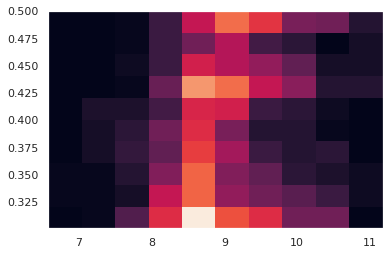

In [16]:
plt.hist2d(mass,redshift)

In [68]:
redshift.shape

(1113,)

In [70]:
np.min(zmax)

0.311186

In [71]:
np.max(zmax)

0.5

In [17]:
V_0 = []
for i in range(len(zmax)):
    temp = cosmo.comoving_volume(zmax[i]) - cosmo.comoving_volume(0.3)
    V_0.append(temp.value)
    
V_1 = np.array(V_0)
# weight0 = Vtotal.value/ V_1
Vtotal = cosmo.comoving_volume(0.5) - cosmo.comoving_volume(0.3)
# Vtotal
weight0 = Vtotal.value/V_1

In [18]:
wei_final = wei * weight0

Text(0.5, 1.0, '$VVDS \\ Redshift : 0.3 \\sim 0.5$')

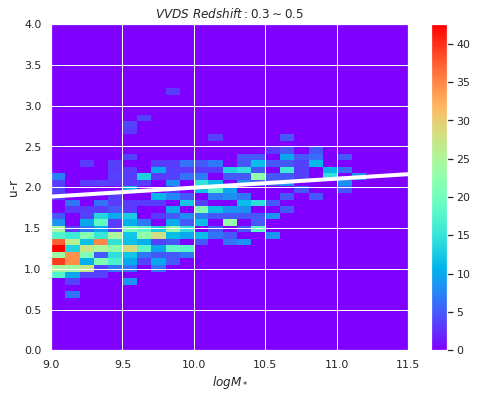

In [19]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
# weight2 = counts / np.sum(counts,axis = 0)
# weight2[weight2==0]=np.nan
plt.imshow(counts,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto')
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
# plt.grid()
# plt.savefig("./vvds_number.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

/tmp/ipykernel_100326/3369416510.py:6: RuntimeWarning: invalid value encountered in true_divide
  weight2 = counts / np.sum(counts,axis = 0)


Text(0.5, 1.0, '$VVDS \\ Redshift : 0.3 \\sim 0.5$')

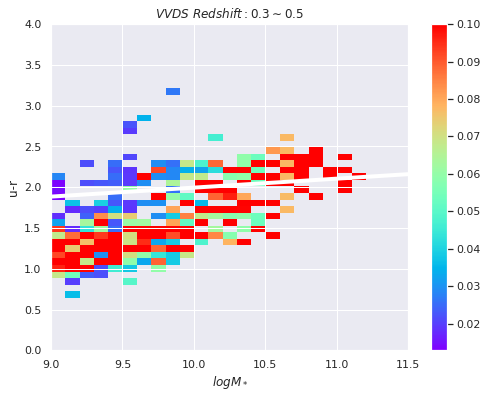

In [20]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
weight2 = counts / np.sum(counts,axis = 0)
weight2[weight2==0]=np.nan
plt.imshow(weight2,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto',vmax=0.1)
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
# plt.grid()
# plt.savefig("./vvds_density.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

In [21]:
weight1 = wei_final
massbin = np.array([9.0,9.5,10.0,10.5,11])
All = np.zeros(4)
up = np.zeros(4)
down = np.zeros(4)
frac = np.zeros(4)
for i in range(len(massbin)-1):
    index = ((mass>=massbin[i])&(mass<massbin[i+1])&(u_r>=0.0)&(u_r<=4.0))
    All[i] = np.sum(weight1[index])
    print("The length of All:",len(weight1[index]))
    print(All[i])
    cut = ((u_r[index]-(0.11 * mass[index] - 0.45 * 0.1 + 0.94))>0)
    up[i] = np.sum(weight1[index][cut])
    print("The length of up:",len(weight1[index][cut]))
    print(up[i])
    down[i] = np.sum(weight1[index][~cut])
    print("The length of down:",len(weight1[index][~cut]))
    print(down[i])

The length of All: 240
897.679032621084
The length of up: 11
38.46854641068104
The length of down: 229
859.210486210403
The length of All: 147
609.0138258245909
The length of up: 31
105.1641121783138
The length of down: 116
503.849713646277
The length of All: 91
434.57459462024735
The length of up: 35
150.52664438812502
The length of down: 56
284.04795023212233
The length of All: 34
174.9910923974821
The length of up: 25
120.73825486431485
The length of down: 9
54.252837533167266


([<matplotlib.axis.YTick at 0x2ad8d37ac760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

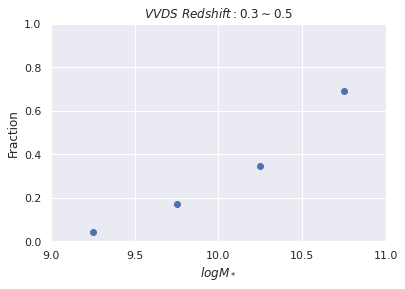

In [22]:
frac = up / All
massbin_0 = 0.5 * (massbin[1:]+massbin[:-1])
plt.scatter(massbin_0,frac)
plt.xlabel("$log M_*$")
plt.ylabel("Fraction")
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
plt.xticks(np.arange(9, 11.1, step=0.5))
plt.yticks(np.arange(0, 1.01, step=0.2))
# plt.savefig("./VVDS_frac.pdf",dpi=100)

In [23]:
frac

array([0.04285334, 0.17267935, 0.346377  , 0.689968  ])

In [75]:
frac

array([0.04285334, 0.17267935, 0.346377  , 0.689968  ])

In [26]:
35/91

0.38461538461538464

## 0.5-0.7

In [77]:
index = ((redshift<=0.7)&(redshift>=0.5))
mass = mass[index]
u_r = u_r[index]
zmax = zmax[index]
zmax[(zmax>0.7)]=0.7
redshift = redshift[index]
wei = wei_all[index]

In [54]:
wei

3.210717287683704
2.638880627241233
2.5947119201457434
3.2116452737103396
3.2768722409668367
3.262366750651432
2.882973819821046
3.262366750651432
3.2768722409668367
3.262366750651432
3.1498326785450526


In [78]:
V_0 = []
for i in range(len(zmax)):
    temp = cosmo.comoving_volume(zmax[i]) - cosmo.comoving_volume(0.5)
    V_0.append(temp.value)
    
V_1 = np.array(V_0)
# weight0 = Vtotal.value/ V_1
Vtotal = cosmo.comoving_volume(0.7) - cosmo.comoving_volume(0.5)
# Vtotal
weight0 = Vtotal.value/V_1

In [79]:
wei_final = wei * weight0

Text(0.5, 1.0, '$VVDS \\ Redshift : 0.5 \\sim 0.7$')

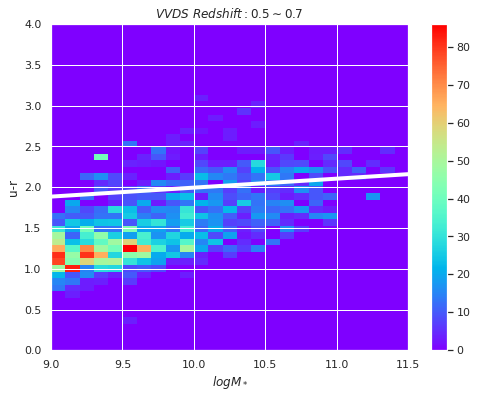

In [59]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
# weight2 = counts / np.sum(counts,axis = 0)
# weight2[weight2==0]=np.nan
plt.imshow(counts,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto')
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.5 \sim 0.7$")
# plt.grid()
# plt.savefig("./vvds_number.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

/tmp/ipykernel_362522/4134459825.py:6: RuntimeWarning: invalid value encountered in true_divide
  weight2 = counts / np.sum(counts,axis = 0)


Text(0.5, 1.0, '$VVDS \\ Redshift : 0.5 \\sim 0.7$')

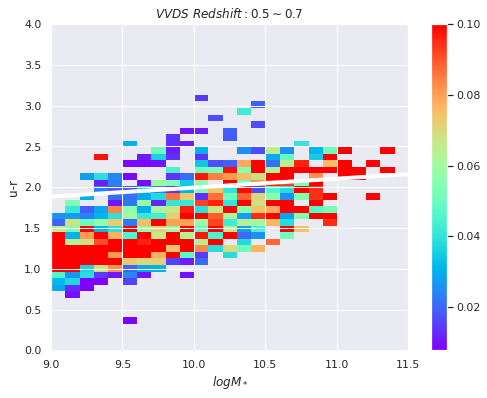

In [61]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
weight2 = counts / np.sum(counts,axis = 0)
weight2[weight2==0]=np.nan
plt.imshow(weight2,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto',vmax=0.1)
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.5 \sim 0.7$")
# plt.grid()
# plt.savefig("./vvds_density.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

In [80]:
weight1 = wei_final
massbin = np.array([9.0,9.5,10.0,10.5,11])
All = np.zeros(4)
up = np.zeros(4)
down = np.zeros(4)
frac = np.zeros(4)
for i in range(len(massbin)-1):
    index = ((mass>=massbin[i])&(mass<massbin[i+1])&(u_r>=0.0)&(u_r<=4.0))
    All[i] = np.sum(weight1[index])
    print("The length of All:",len(weight1[index]))
    print(All[i])
    cut = ((u_r[index]-(0.11 * mass[index] - 0.45 * 0.1 + 0.94))>0)
    up[i] = np.sum(weight1[index][cut])
    print("The length of up:",len(weight1[index][cut]))
    print(up[i])
    down[i] = np.sum(weight1[index][~cut])
    print("The length of down:",len(weight1[index][~cut]))
    print(down[i])

The length of All: 552
2113.2047840894666
The length of up: 14
125.6702416151621
The length of down: 538
1987.534542474304
The length of All: 448
1644.5154942449485
The length of up: 43
160.65970082231706
The length of down: 405
1483.8557934226315
The length of All: 250
933.3979044358246
The length of up: 84
290.19080030153134
The length of down: 166
643.2071041342933
The length of All: 118
534.4496778771429
The length of up: 51
199.21556646508674
The length of down: 67
335.2341114120562


([<matplotlib.axis.YTick at 0x2b37e7f867f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

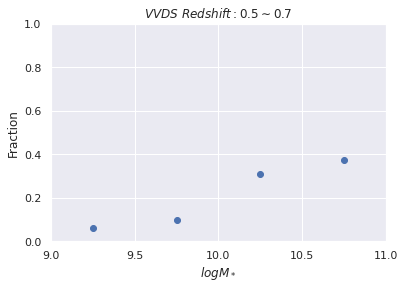

In [81]:
frac = up / All
massbin_0 = 0.5 * (massbin[1:]+massbin[:-1])
plt.scatter(massbin_0,frac)
plt.xlabel("$log M_*$")
plt.ylabel("Fraction")
plt.title("$VVDS \ Redshift : 0.5 \sim 0.7$")
plt.xticks(np.arange(9, 11.1, step=0.5))
plt.yticks(np.arange(0, 1.01, step=0.2))
# plt.savefig("./VVDS_frac.pdf",dpi=100)

In [64]:
frac

array([0.05252471, 0.09620879, 0.30929788, 0.37143018])

In [82]:
frac

array([0.05946903, 0.09769425, 0.31089721, 0.37274897])